# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Evameivina/revisi/refs/heads/main/bank_transactions_data_2.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
def tampilkan_info(df):
    baris, kolom = df.shape
    print(f"Jumlah kolom: {kolom}")
    print(f"Jumlah baris: {baris}")

tampilkan_info(df)

Jumlah kolom: 16
Jumlah baris: 2512


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


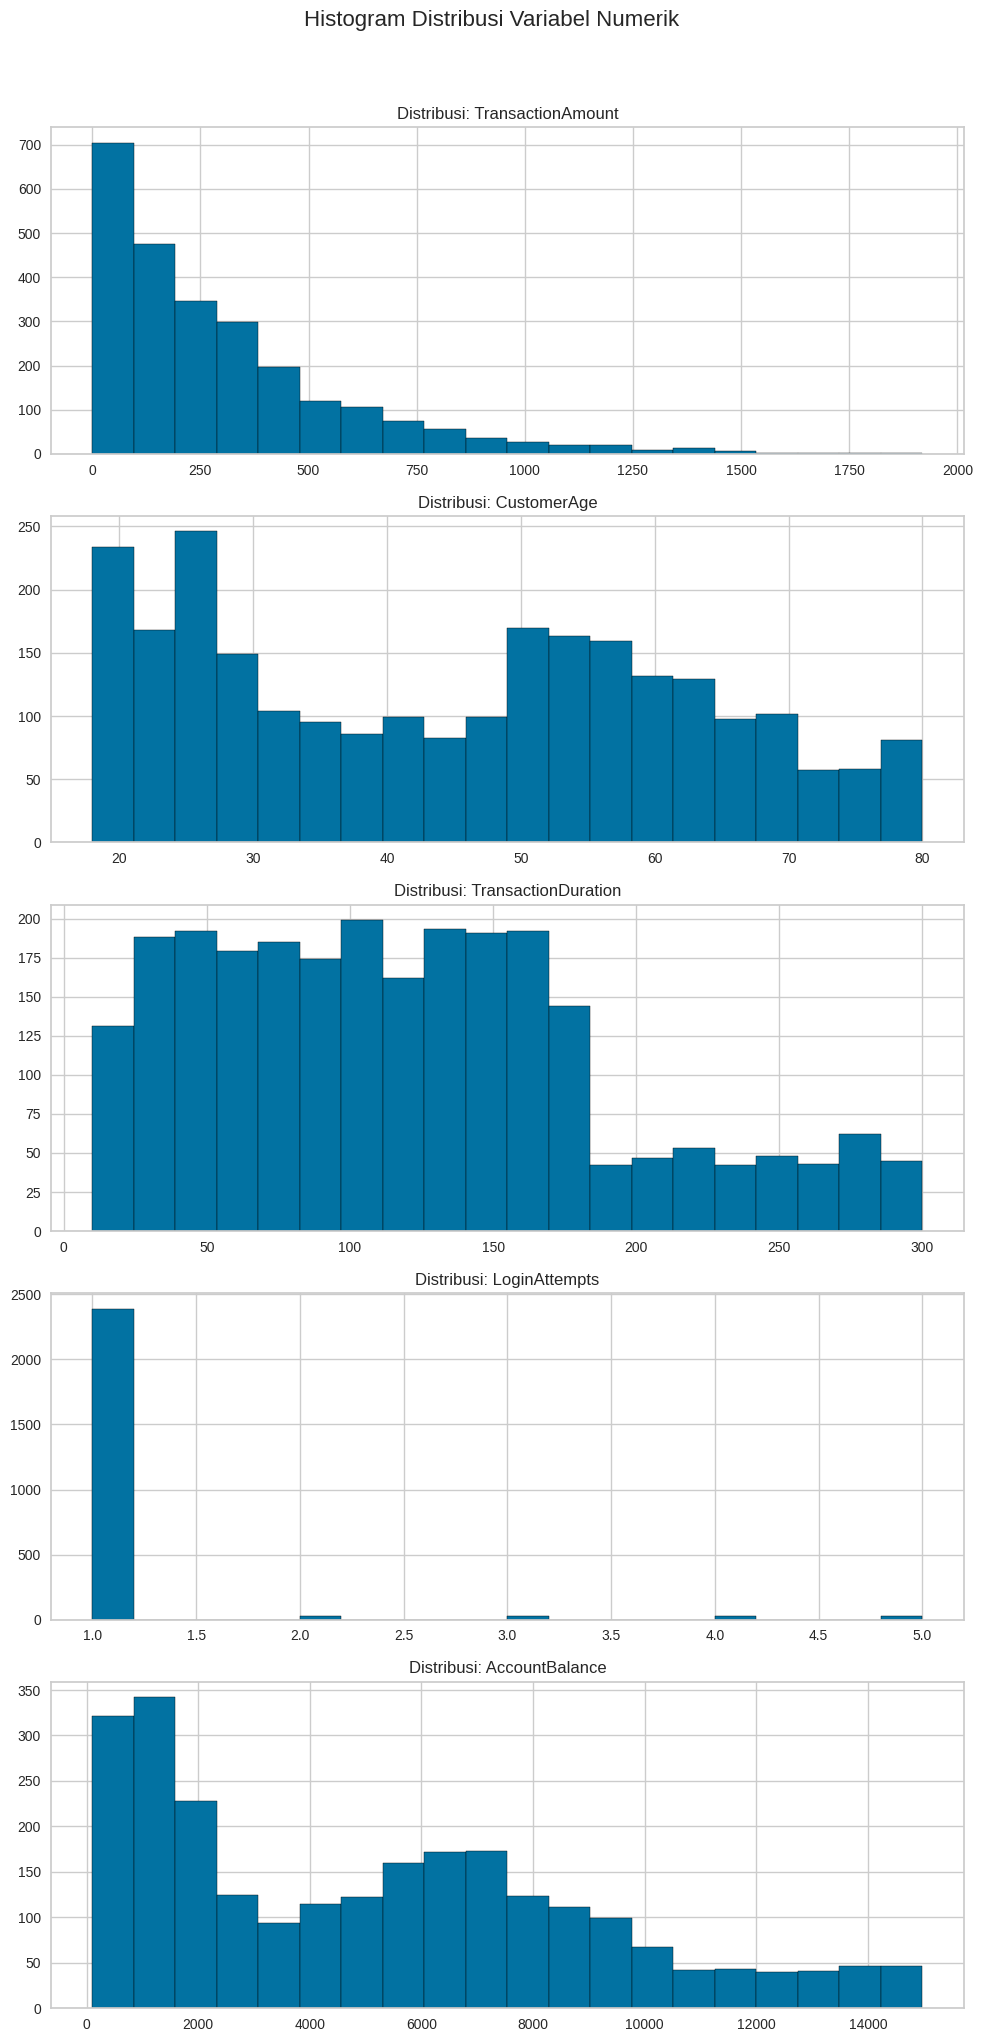

In [ ]:
numerics = df.select_dtypes(include=['number'])
fig, axes = plt.subplots(len(numerics.columns), 1, figsize=(10, 4 * len(numerics.columns)))
if len(numerics.columns) == 1: axes = [axes]
for i, col in enumerate(numerics.columns):
    axes[i].hist(numerics[col], bins=20, edgecolor='black')
    axes[i].set_title(f'Distribusi: {col}')
plt.suptitle("Histogram Distribusi Variabel Numerik", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

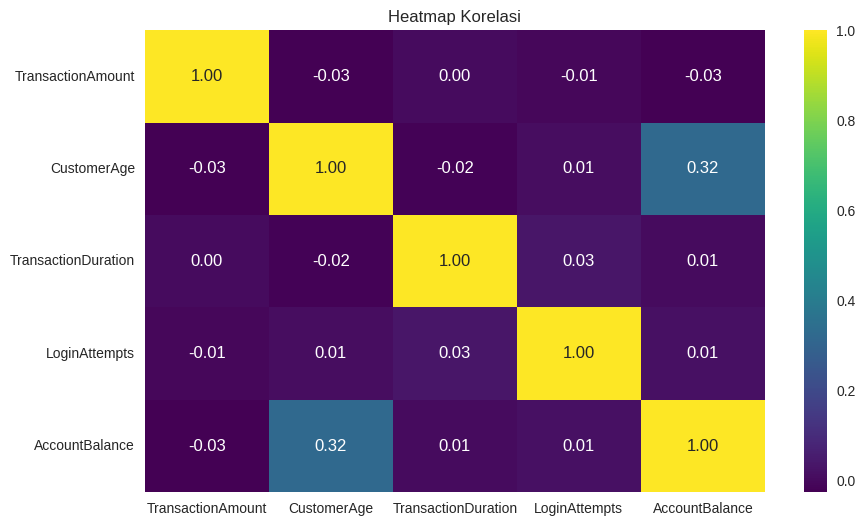

In [ ]:
corr = df.corr(numeric_only=True)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', ax=ax)
ax.set_title("Heatmap Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
df_cleaned = df.copy()

In [ ]:
features = ['TransactionAmount', 'TransactionType', 'Channel', 'TransactionDuration', 'AccountBalance', 'CustomerAge']
df_cleaned = df_cleaned.loc[:, features]

In [ ]:
df_cleaned.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Channel,0
TransactionDuration,0
AccountBalance,0
CustomerAge,0


In [ ]:
len(df_cleaned[df_cleaned.duplicated()])

0

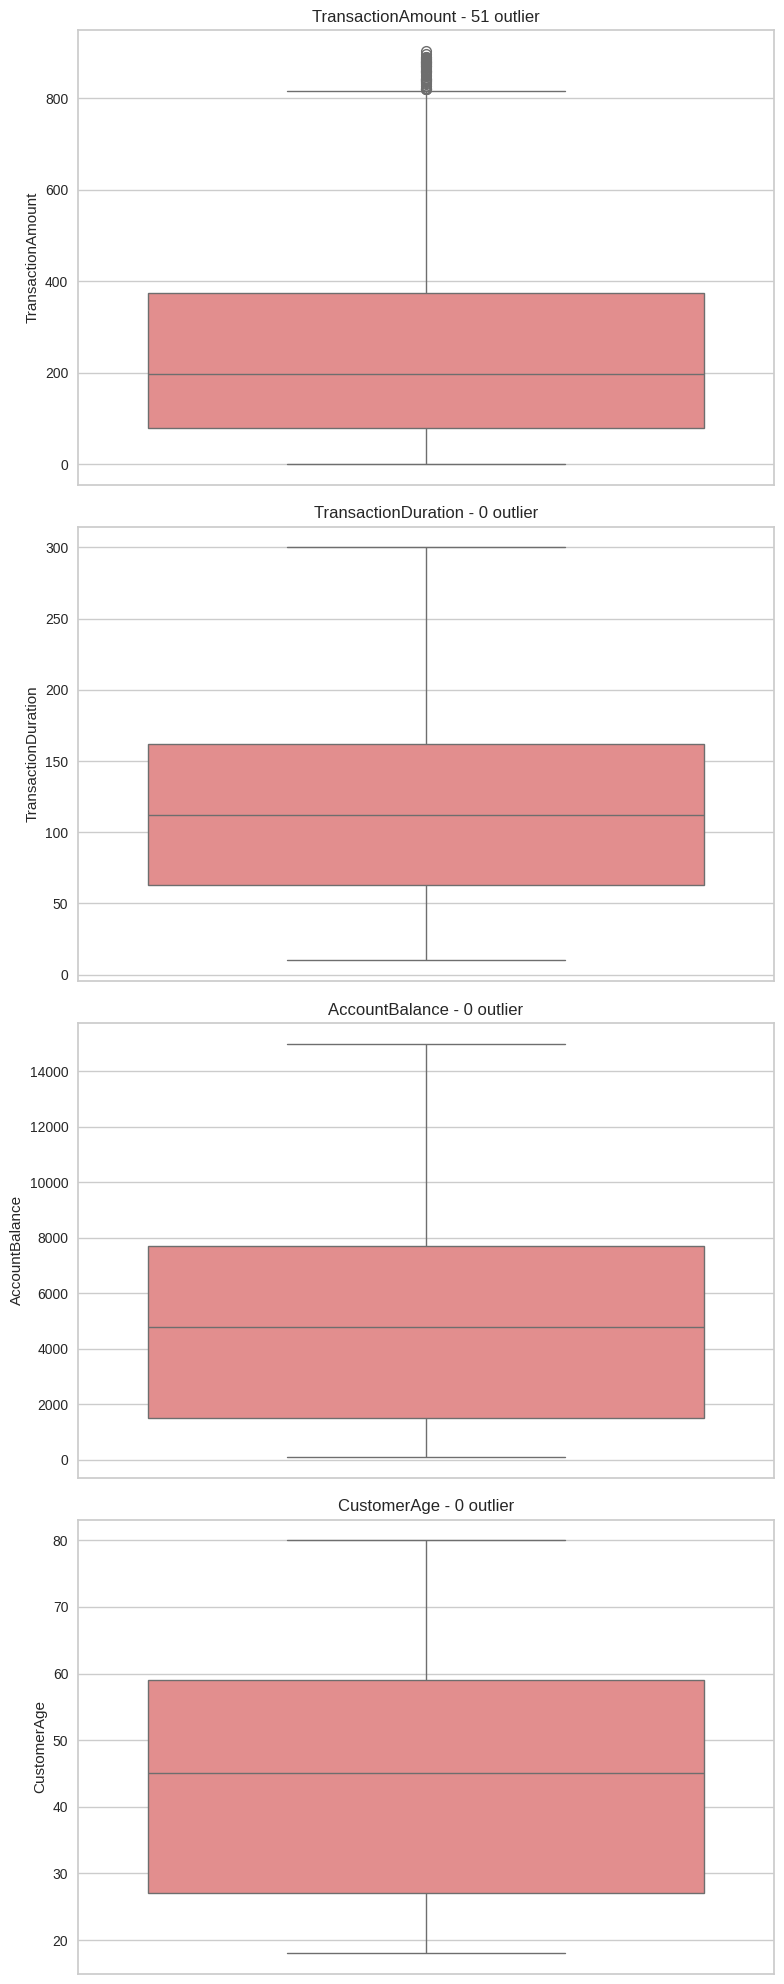

In [ ]:
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8, 5 * len(numeric_columns)))

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(y=df_cleaned[col], color="lightcoral", ax=ax)
    Q1, Q3 = df_cleaned[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low, up = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    count = ((df_cleaned[col] < low) | (df_cleaned[col] > up)).sum()
    ax.set_title(f"{col} - {count} outlier", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:

numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df_cleaned[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"{col} column: {len(outliers)} outlier")

plt.tight_layout()
plt.show()

In [ ]:
columns_to_check = df_cleaned.select_dtypes(include=['number']).columns

def remove_outliers(df, columns):
    mask = pd.Series(True, index=df.index)
    for col in columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        low, up = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        mask &= df[col].between(low, up)
    return df[mask]

df_cleaned = remove_outliers(df_cleaned, columns_to_check)

In [ ]:
df_cleaned

,TransactionAmount,TransactionType,Channel,TransactionDuration,AccountBalance,CustomerAge
0,14.09,Debit,ATM,81,5112.21,70
1,376.24,Debit,ATM,141,13758.91,68
2,126.29,Debit,Online,56,1122.35,19
3,184.50,Debit,Online,25,8569.06,26
4,13.45,Credit,Online,198,7429.40,26
...,...,...,...,...,...,...
2506,92.24,Debit,Branch,93,6937.48,60
2508,251.54,Debit,Branch,177,254.75,48
2509,28.63,Debit,Branch,146,3382.91,56
2510,185.97,Debit,Online,19,1776.91,23


# Encoding

In [ ]:
categorical_columns = ['TransactionType', 'Channel']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df_cleaned[categorical_columns])
categorical_encoded = encoder.transform(df_cleaned[categorical_columns])

categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())

# Normalisasi atau Standarisasi

In [ ]:
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

scaler = MinMaxScaler()
scaler.fit(df_cleaned[numerical_columns])
numerical_scaled = scaler.transform(df_cleaned[numerical_columns])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_columns)

In [ ]:
df_cleaned = numerical_df.copy()
df_cleaned[categorical_df.columns] = categorical_df
df_cleaned

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online
0,0.016955,0.838710,0.244828,0.336832,0.0,1.0,1.0,0.0,0.0
1,0.460929,0.806452,0.451724,0.918055,0.0,1.0,1.0,0.0,0.0
2,0.154505,0.016129,0.158621,0.068637,0.0,1.0,0.0,0.0,1.0
3,0.225867,0.129032,0.051724,0.569198,0.0,1.0,0.0,0.0,1.0
4,0.016170,0.129032,0.648276,0.492591,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2343,0.112762,0.677419,0.286207,0.459525,0.0,1.0,0.0,1.0,0.0
2344,0.308054,0.483871,0.575862,0.010318,0.0,1.0,0.0,1.0,0.0
2345,0.034780,0.612903,0.468966,0.220590,0.0,1.0,0.0,1.0,0.0
2346,0.227669,0.080645,0.031034,0.112636,0.0,1.0,0.0,0.0,1.0


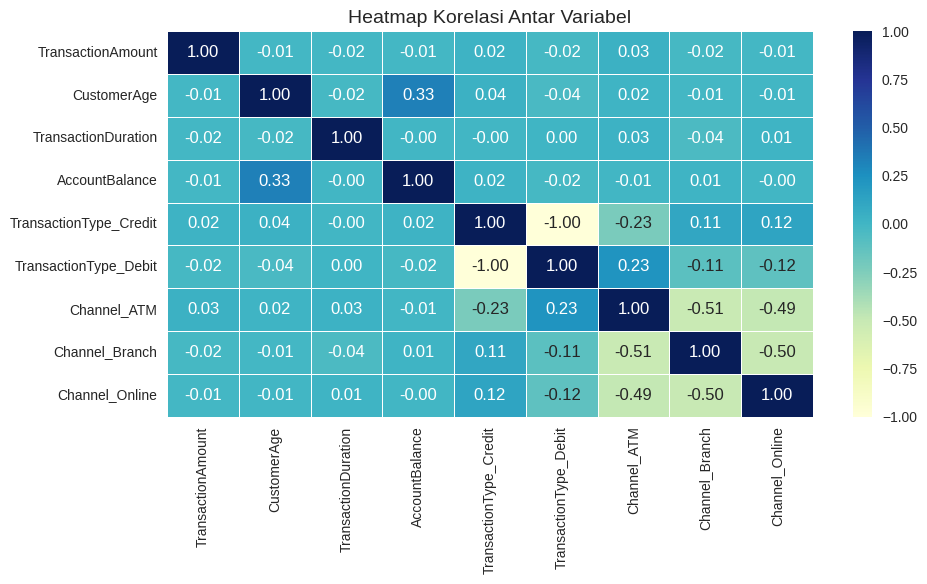

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.select_dtypes(include='number').corr(),
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='white'
)
plt.title("Heatmap Korelasi Antar Variabel", fontsize=14)
plt.tight_layout()
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
X = df_cleaned.loc[:, df_cleaned.columns.str.startswith('TransactionAmount') |
                          df_cleaned.columns.str.startswith('CustomerAge') |
                          df_cleaned.columns.str.startswith('TransactionDuration') |
                          df_cleaned.columns.str.startswith('AccountBalance') |
                          df_cleaned.columns.str.startswith('TransactionType_')].to_numpy()

print(pd.DataFrame(X, columns=['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                               'AccountBalance', 'TransactionType_Credit', 'TransactionType_Debit']))

      TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
0              0.016955     0.838710             0.244828        0.336832   
1              0.460929     0.806452             0.451724        0.918055   
2              0.154505     0.016129             0.158621        0.068637   
3              0.225867     0.129032             0.051724        0.569198   
4              0.016170     0.129032             0.648276        0.492591   
...                 ...          ...                  ...             ...   
2343           0.112762     0.677419             0.286207        0.459525   
2344           0.308054     0.483871             0.575862        0.010318   
2345           0.034780     0.612903             0.468966        0.220590   
2346           0.227669     0.080645             0.031034        0.112636   
2347           0.297683     0.096774             0.286207        0.002017   

      TransactionType_Credit  TransactionType_Debit  
0                    

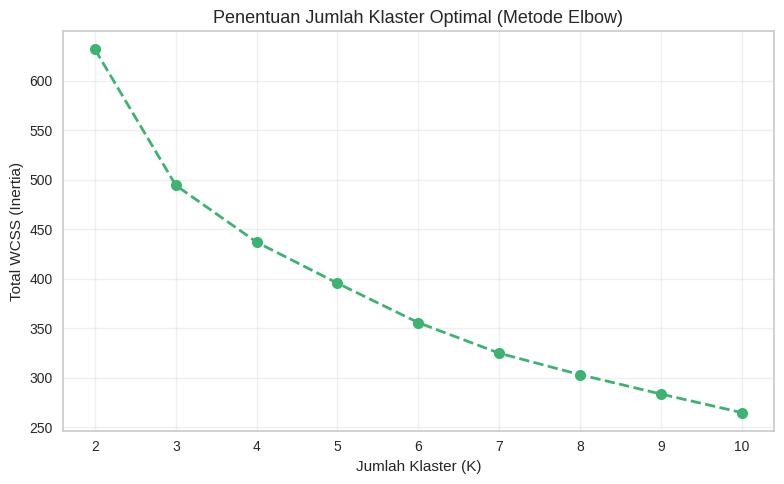

In [ ]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', color='mediumseagreen', linestyle='--', linewidth=2, markersize=8)
plt.title("Penentuan Jumlah Klaster Optimal (Metode Elbow)", fontsize=13)
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Total WCSS (Inertia)")
plt.grid(alpha=0.3)
plt.xticks(range(2, 11))
plt.tight_layout()
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
kmeans_before = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans_before.fit(df_cleaned).labels_

score_silhouette = silhouette_score(df_cleaned, labels)
print(f"Nilai Silhouette (sebelum seleksi fitur): {score_silhouette:.2f}")

Nilai Silhouette (sebelum seleksi fitur): 0.49


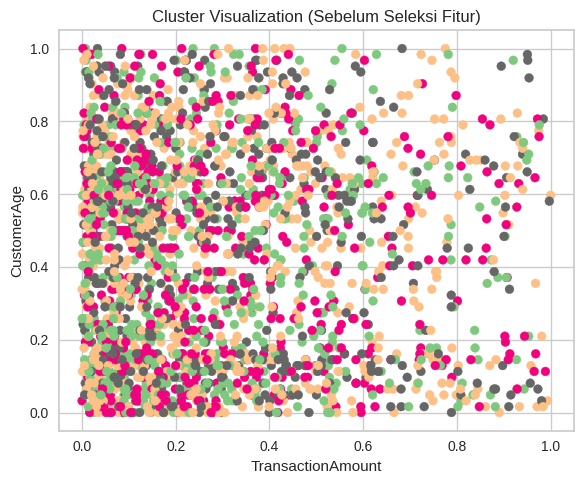

In [ ]:
kmeans_before = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans_before.fit_predict(df_cleaned)

plt.figure(figsize=(6, 5))
plt.scatter(df_cleaned.iloc[:, 0], df_cleaned.iloc[:, 1], c=labels, cmap='Accent', s=40)
plt.title("Cluster Visualization (Sebelum Seleksi Fitur)")
plt.xlabel(df_cleaned.columns[0])
plt.ylabel(df_cleaned.columns[1])
plt.grid(True)
plt.tight_layout()
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

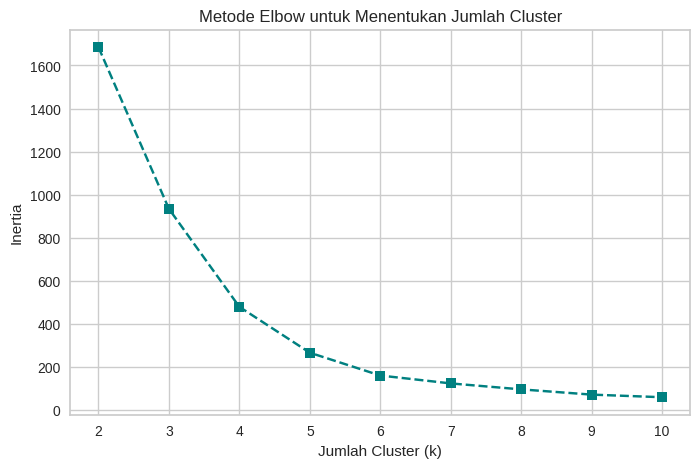

In [ ]:
selector = SelectKBest(score_func=mutual_info_classif, k=6)
X = selector.fit_transform(df_cleaned, np.zeros(df_cleaned.shape[0]))

inertia_values = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='s', color='teal', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.grid(True)
plt.show()

In [ ]:
kmeans_after = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_after.fit(X)
labels = kmeans_after.labels_

silhouette_avg = silhouette_score(X, labels)
print("Skor Silhouette setelah seleksi fitur adalah sebesar: {:.2f}".format(silhouette_avg))

Skor Silhouette setelah seleksi fitur adalah sebesar: 0.76


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

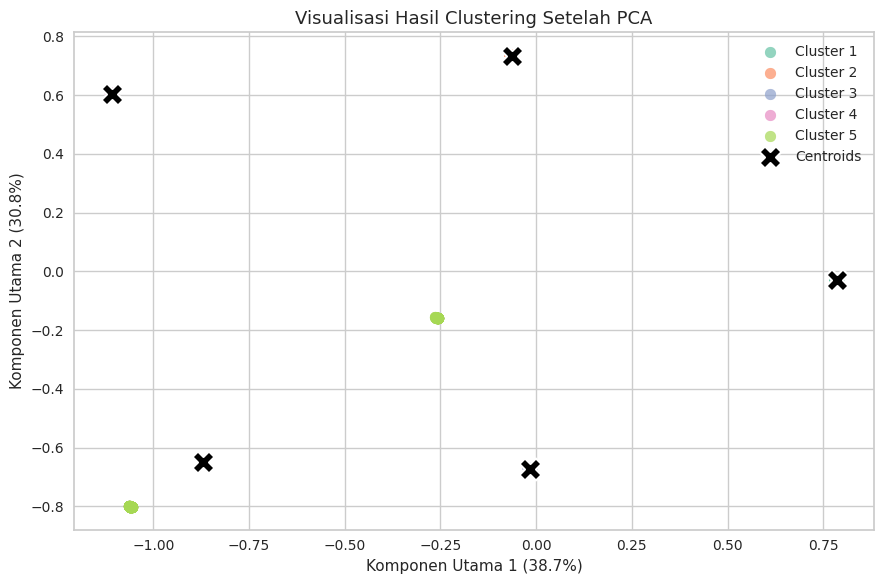

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(kmeans_after.cluster_centers_)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")

palette = sns.color_palette("Set2", np.unique(labels).shape[0])
for cluster_id in np.unique(labels):
    plt.scatter(
        X_pca[labels == cluster_id, 0],
        X_pca[labels == cluster_id, 1],
        s=60,
        alpha=0.7,
        label=f'Cluster {cluster_id + 1}',
        color=palette[cluster_id]
    )

plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='black',
    marker='X',
    s=250,
    edgecolors='white',
    linewidths=1.5,
    label='Centroids'
)

plt.xlabel(f'Komponen Utama 1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'Komponen Utama 2 ({explained_variance[1]*100:.1f}%)')
plt.title('Visualisasi Hasil Clustering Setelah PCA', fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df_normalized = pd.DataFrame(df_cleaned.values, columns=df_cleaned.columns)

In [ ]:
cluster_labels = kmeans_after.predict(X)
df_normalized.insert(loc=len(df_normalized.columns), column='Cluster', value=cluster_labels)

In [ ]:
decoded_array = encoder.inverse_transform(categorical_encoded)
decoded_df = pd.DataFrame(decoded_array, columns=categorical_columns)

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
restored_numerical = scaler.inverse_transform(numerical_scaled)
original_numerical_df = pd.DataFrame(restored_numerical, columns=numerical_columns)

In [ ]:
df_normalized = pd.concat([decoded_df.reset_index(drop=True), original_numerical_df.reset_index(drop=True)], axis=1)

In [ ]:
df_normalized.loc[:, 'Cluster'] = kmeans_after.labels_

In [ ]:
df_normalized['CustomerAge'] = df_normalized['CustomerAge'].round().astype(int)

In [ ]:
df_normalized

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster
0,Debit,ATM,14.09,70,81.0,5112.21,0
1,Debit,ATM,376.24,68,141.0,13758.91,0
2,Debit,Online,126.29,19,56.0,1122.35,2
3,Debit,Online,184.50,26,25.0,8569.06,2
4,Credit,Online,13.45,26,198.0,7429.40,4
...,...,...,...,...,...,...,...
2343,Debit,Branch,92.24,60,93.0,6937.48,1
2344,Debit,Branch,251.54,48,177.0,254.75,1
2345,Debit,Branch,28.63,56,146.0,3382.91,1
2346,Debit,Online,185.97,23,19.0,1776.91,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
numerik_cluster = df_normalized.select_dtypes(include='number').columns
cluster_means = df_normalized.groupby('Cluster')[numerik_cluster].mean()
cluster_means['CustomerAge'] = cluster_means['CustomerAge'].round().astype(int)

cluster_summary_t = cluster_means.T
cluster_summary_t.index.name = None
cluster_summary_t.columns = [f'Cluster {i}' for i in cluster_summary_t.columns]

cluster_summary_t.round(2)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
TransactionAmount,249.68,226.80,242.81,260.33,238.54
CustomerAge,45.00,44.00,44.00,46.00,46.00
TransactionDuration,122.03,115.51,119.54,114.49,122.95
AccountBalance,5143.53,5248.83,4890.36,5032.81,5429.90
Cluster,0.00,1.00,2.00,3.00,4.00


In [ ]:
objek_kolom = df_normalized.select_dtypes(include='object').columns

cluster_kategori_counts = (
    df_normalized
    .groupby(['Cluster'] + list(objek_kolom))
    .size()
    .reset_index(name='Jumlah')
    .sort_values(['Cluster', 'Jumlah'], ascending=[True, False])
)

cluster_kategori_counts

,Cluster,TransactionType,Channel,Jumlah
0,0,Debit,ATM,712
1,1,Debit,Branch,581
2,2,Debit,Online,529
3,3,Credit,Branch,232
5,4,Credit,Online,225
4,4,Credit,ATM,69


In [ ]:
cluster_modes = df_normalized.groupby('Cluster').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
cluster_modes

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance
Cluster,,,,,,
0,Debit,ATM,29.22,27,88.0,112.76
1,Debit,Branch,28.38,27,63.0,117.98
2,Debit,Online,16.73,28,68.0,101.25
3,Credit,Branch,3.30,28,44.0,105.01
4,Credit,Online,425.18,26,109.0,131.25


In [ ]:
def ambil_modus(series):
    nilai_modus = series.mode()
    return nilai_modus.iloc[0] if not nilai_modus.empty else None
fitur_numerik = df_normalized.select_dtypes(include='number').columns.drop('Cluster', errors='ignore')
fitur_kategorik = df_normalized.select_dtypes(include='object').columns
agregasi_numerik = {kolom: ['min', 'max', 'mean', 'std'] for kolom in fitur_numerik}
agregasi_kategorik = {kolom: ambil_modus for kolom in fitur_kategorik}
rangkuman_cluster = df_normalized.groupby('Cluster').agg({**agregasi_numerik, **agregasi_kategorik})
rangkuman_cluster

TransactionAmount                                 CustomerAge      \
                      min     max        mean         std         min max   
Cluster                                                                     
0                    0.32  815.96  249.679256  206.051674          18  80   
1                    0.45  796.30  226.801274  192.680025          18  80   
2                    0.26  806.97  242.811796  196.918877          18  80   
3                    3.30  803.37  260.334353  195.406528          18  80   
4                    2.03  813.78  238.544422  206.635111          18  80   

                              TransactionDuration                     \
              mean        std                 min    max        mean   
Cluster                                                                
0        45.299157  17.920173                11.0  300.0  122.028090   
1        43.924269  17.623391                10.0  298.0  115.506024   
2        43.775047  17.717492                10.0  297.0  119.542533   
3        46.030172  17.612322                10.0  293.0  114.487069   
4        45.867347  17.840383                10.0  294.0  122.945578   

                   AccountBalance                                      \
               std            min       max         mean          std   
Cluster                                                                 
0        69.733383         112.76  14977.99  5143.534087  3929.261654   
1        70.629109         117.98  14904.90  5248.827659  3857.283890   
2        70.975579         101.25  14852.42  4890.356314  3819.380583   
3        66.632544         105.01  14847.97  5032.813233  3875.392578   
4        69.488161         131.25  14935.50  5429.896973  4086.059252   

        TransactionType     Channel  
            ambil_modus ambil_modus  
Cluster                              
0                 Debit         ATM  
1                 Debit      Branch  
2                 Debit      Online  
3                Credit      Branch  
4                Credit      Online

**Tulis hasil interpretasinya di sini**

**Klaster 0**

* Pengguna di klaster ini cenderung memilih metode Debit via ATM.
* Usia rata-rata mereka sekitar 45 tahun, dan nominal transaksi umumnya sekitar 249 ribu.
* Durasi transaksi yang sering terjadi berkisar di angka 122 detik.

**Klaster 1**
* Kelompok ini lebih suka datang langsung ke cabang (Branch) dan tetap memakai Debit.
* Usia pelanggan rata-rata 43 tahun, dan nominal transaksi di kisaran 226 ribuan.
* Waktu transaksi biasanya berlangsung selama 115 detik.

**Klaster 2**
* Transaksi paling dominan dilakukan secara online dengan kartu Debit.
* Pengguna di klaster ini berusia sekitar 43 tahun, dan biasanya bertransaksi sebesar 242 ribu.
* Rata-rata durasi transaksi berada di angka 119 detik.

**Klaster 3**
* Mereka cenderung menggunakan kartu Kredit langsung ke cabang bank.
* Mayoritas berusia 46 tahun, dengan transaksi rata-rata 260 ribuan.
* Durasi aktivitas per transaksi cukup cepat, yakni sekitar 114 detik.

**Klaster 4**
* Segmen ini mendominasi pada metode Credit via Online.
* Usia rata-rata sekitar 45 tahun, dengan nilai transaksi mendekati 238 ribu.
* Durasi transaksi cenderung lebih lama dibanding klaster lain, yaitu sekitar 123 detik.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan rata-rata fitur utama.

## Cluster 0:
- **Rata-rata TransactionAmount:** 249.68  
- **Rata-rata CustomerAge:** 45 tahun  
- **Rata-rata TransactionDuration:** 122.03 detik  
- **Rata-rata AccountBalance:** 5.143.530  
- **Analisis:** Cluster ini terdiri dari pengguna dengan usia matang dan aktivitas transaksi yang cukup aktif. Durasi transaksi yang cukup lama dapat menunjukkan adanya proses transaksi yang lebih kompleks. Dengan saldo yang tinggi dan nominal transaksi yang sedang, mereka mungkin merupakan pengguna yang mapan dengan kebutuhan transaksi rutin.

## Cluster 1:
- **Rata-rata TransactionAmount:** 226.80  
- **Rata-rata CustomerAge:** 44 tahun  
- **Rata-rata TransactionDuration:** 115.51 detik  
- **Rata-rata AccountBalance:** 5.248.830  
- **Analisis:** Pengguna di cluster ini memiliki saldo yang cukup tinggi meskipun nominal transaksi cenderung lebih kecil. Usia yang relatif muda menunjukkan kemungkinan mereka adalah pekerja aktif yang mengelola keuangannya dengan hati-hati. Transaksi dilakukan dengan cukup efisien dan tidak terlalu memakan waktu.

## Cluster 2:
- **Rata-rata TransactionAmount:** 242.81  
- **Rata-rata CustomerAge:** 44 tahun  
- **Rata-rata TransactionDuration:** 119.54 detik  
- **Rata-rata AccountBalance:** 4.890.360  
- **Analisis:** Klaster ini berisi pengguna dengan saldo sedikit lebih rendah dibanding klaster lainnya, namun mereka tetap aktif bertransaksi. Karakteristik ini bisa mencerminkan pengguna yang sering melakukan pembelian dalam jumlah sedang, kemungkinan besar untuk kebutuhan sehari-hari.

## Cluster 3:
- **Rata-rata TransactionAmount:** 260.33  
- **Rata-rata CustomerAge:** 46 tahun  
- **Rata-rata TransactionDuration:** 114.49 detik  
- **Rata-rata AccountBalance:** 5.032.810  
- **Analisis:** Kelompok ini memiliki usia tertua dan nilai transaksi tertinggi, meskipun saldo tidak paling besar. Ini bisa menunjukkan kelompok pengguna yang sering melakukan transaksi besar namun dengan efisiensi waktu tinggi. Mereka kemungkinan pengguna berpengalaman yang tahu apa yang dibutuhkan.

## Cluster 4:
- **Rata-rata TransactionAmount:** 238.54  
- **Rata-rata CustomerAge:** 46 tahun  
- **Rata-rata TransactionDuration:** 122.95 detik  
- **Rata-rata AccountBalance:** 5.429.900  
- **Analisis:** Cluster ini memiliki saldo tertinggi dengan transaksi nominal sedang dan durasi cukup panjang. Pengguna di kelompok ini cenderung stabil secara finansial dan berhati-hati dalam melakukan transaksi, kemungkinan lebih teliti dalam mempertimbangkan keputusan keuangan mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [80]:
df_normalized.to_csv('datasethasilclustering.csv', index=False)